In [11]:
import networkx as nx
import matplotlib.pyplot as plt

def en_kisa_yolu_bul_ve_ciz():
    # 1. Şehir Ağını Oluştur
    Harita= nx.Graph()

    # Duraklar ve Mesafeler
    yollar = [('Kadikoy', 'Uskudar', 5),
        ('Kadikoy', 'Atasehir', 8),
        ('Uskudar', 'Besiktas', 3),
        ('Uskudar', 'Umraniye', 9),
        ('Besiktas', 'Levent', 4),
        ('Besiktas', 'Taksim', 3),
        ('Levent', 'Maslak', 5),
        ('Levent', 'Atasehir', 12),
        ('Atasehir', 'Umraniye', 4),
        ('Umraniye', 'Cekmekoy', 6)]
    Harita.add_weighted_edges_from(yollar)

    print("Destinations")
    print(", ".join(list(Harita.nodes()))) 

    while True:
        baslangic = input("Enter a destination: ").strip()
        if baslangic in Harita.nodes():
            break
        print("ERROR, there are not such a destination name like that.")

    while True:
        hedef = input("Enter the final destination: ").strip()
        if hedef == baslangic:
            print("The destinations cannot be same.")
        elif hedef in Harita.nodes():
            break
        print("ERROR, there are not such a destination name like that.")
    

    try:
        rota = nx.dijkstra_path(Harita, baslangic, hedef, weight='weight')
        mesafe = nx.dijkstra_path_length(Harita, baslangic, hedef, weight='weight')
        
        print(f"The most suitable road")
        print(f"Road: {' -> '.join(rota)}")
        print(f"Distance: {mesafe} km")

    except nx.NetworkXNoPath:
        print(f"{baslangic} ile {hedef} arasında bağlantı yok!")
        return

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(Harita, seed=42) 

    nx.draw_networkx_nodes(Harita, pos, node_size=700, node_color='lightgrey')
    nx.draw_networkx_edges(Harita, pos, width=2, alpha=0.5, edge_color='grey')
    nx.draw_networkx_labels(Harita, pos, font_size=10)
    
    edge_labels = nx.get_edge_attributes(Harita, 'weight')
    nx.draw_networkx_edge_labels(Harita, pos, edge_labels=edge_labels)

    rota_kenarlari = list(zip(rota, rota[1:]))
    nx.draw_networkx_nodes(Harita, pos, nodelist=rota, node_color='red', node_size=800)
    nx.draw_networkx_edges(Harita, pos, edgelist=rota_kenarlari, width=4, edge_color='red')

    plt.title(f"Road;: {baslangic} -> {hedef} ({mesafe} km)")
    plt.axis('off')
    plt.show()


    en_kisa_yolu_bul_ve_ciz()

Destinations
Kadikoy, Uskudar, Atasehir, Besiktas, Umraniye, Levent, Taksim, Maslak, Cekmekoy


Enter a destination:  Cekmeköy


ERROR, there are not such a destination name like that.


Enter a destination:  Cekmekoy
Enter the final destination:  Maslak


The most suitable road
Road: Cekmekoy -> Umraniye -> Atasehir -> Levent -> Maslak
Distance: 27 km


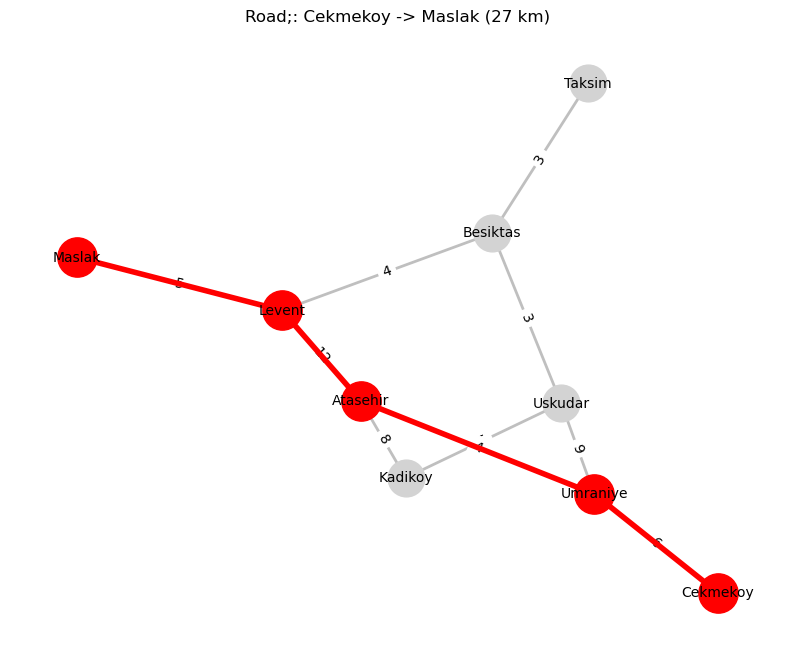

Destinations
Kadikoy, Uskudar, Atasehir, Besiktas, Umraniye, Levent, Taksim, Maslak, Cekmekoy


In [ ]:
en_kisa_yolu_bul_ve_ciz()